11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
Evaluating Naive Bayes...
Naive Bayes Results:
Accuracy: 0.5515714285714286
Precision: 0.6770364512150268
Recall: 0.5515714285714286
F1-Score: 0.5061920628495427
Confusion Matrix:
[[1218    2    9    2    4    2   52    2   32   20]
 [   2 1520    3    5    0    4   15    1   39   11]
 [ 142   40  408  102    5    5  331    0  327   20]
 [ 118   66   12  462    2    8   90    9  496  170]
 [  51    7   15    6  170    7  146    5  278  610]
 [ 183   31   10   18    4   56   77    3  757  134]
 [  16   25    6    0    2    4 1316    0   24    3]
 [   8   10    3   16    8    3    1  417   50  987]
 [  28  160    5    9    3    3   30    3  816  300]
 [   9    8    7    4    8    0    1   20   24 1339]]
ROC AUC: 0.9287375069885686
Evaluating Random Forest...
Random Forest Results:
Accuracy: 0.9675
Precision: 0.9675018656506922
Recall: 0.9675
F1-Score: 0.9674871124026196
Confusion Matrix:
[[1325    0    4    0    1    1    3    1    6    

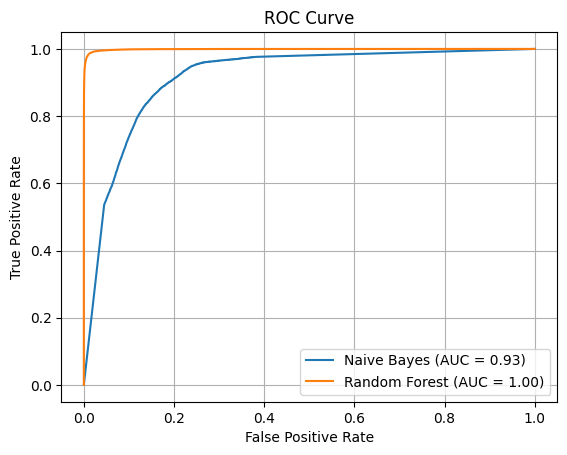

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, KFold
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, roc_auc_score, roc_curve
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.preprocessing import label_binarize
from sklearn.metrics import RocCurveDisplay
import tensorflow as tf

(X_train_full, y_train_full), (X_test, y_test) = tf.keras.datasets.mnist.load_data()

X_train_full = X_train_full.reshape(-1, 28 * 28) / 255.0
X_test = X_test.reshape(-1, 28 * 28) / 255.0

X = np.vstack((X_train_full, X_test))
y = np.hstack((y_train_full, y_test))

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

y_test_bin = label_binarize(y_test, classes=np.unique(y))
n_classes = y_test_bin.shape[1]
kf = KFold(n_splits=5, shuffle=True, random_state=42)
models = {
    "Naive Bayes": GaussianNB(),
    "Random Forest": RandomForestClassifier(n_estimators=100, random_state=42)
}
results = {}
def calculate_metrics(y_true, y_pred, y_prob=None):
    metrics = {
        "Accuracy": accuracy_score(y_true, y_pred),
        "Precision": precision_score(y_true, y_pred, average='weighted'),
        "Recall": recall_score(y_true, y_pred, average='weighted'),
        "F1-Score": f1_score(y_true, y_pred, average='weighted'),
        "Confusion Matrix": confusion_matrix(y_true, y_pred)
    }
    if y_prob is not None:
        metrics["ROC AUC"] = roc_auc_score(y_test_bin, y_prob, multi_class="ovr")
    return metrics

for model_name, model in models.items():
    print(f"Evaluating {model_name}...")
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    y_prob = model.predict_proba(X_test) if hasattr(model, "predict_proba") else None

    metrics = calculate_metrics(y_test, y_pred, y_prob)
    results[model_name] = metrics

    print(f"{model_name} Results:")
    for metric, value in metrics.items():
        if metric == "Confusion Matrix":
            print(f"{metric}:\n{value}")
        else:
            print(f"{metric}: {value}")

    if y_prob is not None:
        fpr, tpr, _ = roc_curve(y_test_bin.ravel(), y_prob.ravel())
        plt.plot(fpr, tpr, label=f'{model_name} (AUC = {metrics["ROC AUC"]:.2f})')

plt.title("ROC Curve")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend(loc="lower right")
plt.grid()
plt.show()
